In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [5]:
# Define the paths to the directories
apple_dir = 'apple_dir'
banana_dir = 'banana_dir'

# Function to load images from a directory
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image file extensions
            image_path = os.path.join(directory, filename)
            image = load_img(image_path, target_size=(224, 224))  # Resize image to match VGG input
            image = img_to_array(image)
            images.append(image)
            label = 1 if 'apple' in directory else 0  # Label apple as 1 and banana as 0
            labels.append(label)
    return images, labels

# Load all images
apple_images, apple_labels = load_images(apple_dir)
banana_images, banana_labels = load_images(banana_dir)

# Combine the datasets
images = apple_images + banana_images
labels = apple_labels + banana_labels

# Optionally convert lists to numpy arrays for training
images = np.array(images)
labels = np.array(labels)

# Normalize the image vectors
images /= 255.0

# Print shapes to verify
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (222, 224, 224, 3)
Labels shape: (222,)


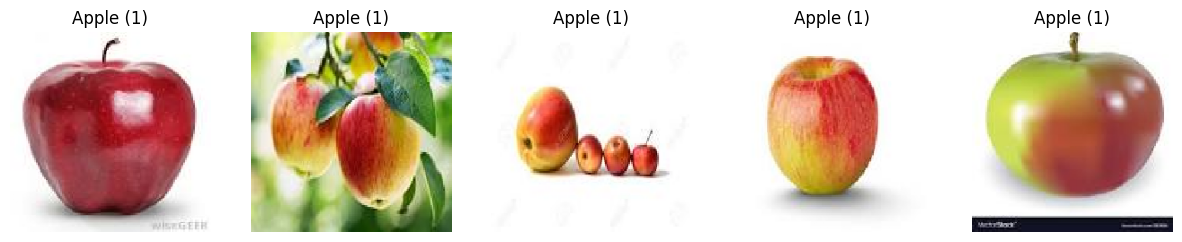

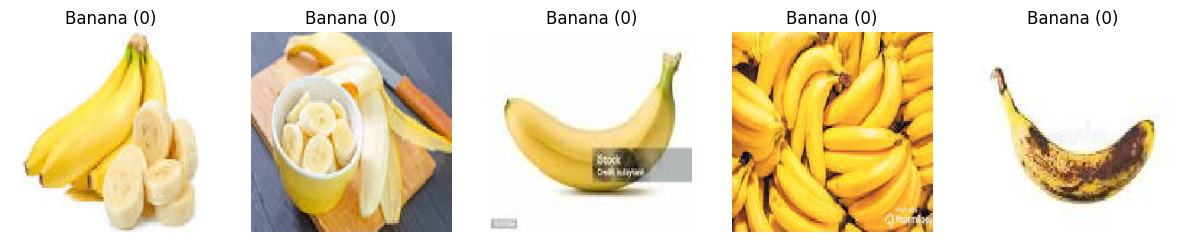

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Define the label mappings
label_mappings = {0: 0, 1: 1}

# Function to display images with specific labels
def display_images(images, labels, label_value, title, num_images=5):
    # Filter images by label
    filtered_images = images[labels == label_value][:num_images]

    # Create a figure with subplots
    plt.figure(figsize=(15, 3))
    for i, image in enumerate(filtered_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f"{title} ({label_mappings[label_value]})")
        plt.axis('off')
    plt.show()

# Display images labeled as '1' (Apple)
display_images(images, labels, 1, 'Apple', num_images=5)

# Display images labeled as '0' (Banana)
display_images(images, labels, 0, 'Banana', num_images=5)


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime
import numpy as np

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [12]:
# Train the VGG (1 block) model
import time

# Modified train_model function to capture training time and model parameters
def train_model(model, X_train, y_train, X_test, y_test, model_name, epochs=10):
    start_time = time.time()  # Start time for training
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=2
    )
    
    end_time = time.time()  # End time after training completes
    training_time = end_time - start_time  # Calculate total training time in seconds

    # Capture the model's number of parameters
    num_params = model.count_params()
    
    # Return necessary details
    return {
        'history': history,
        'training_time': training_time / 60,  # Convert to minutes
        'num_params': num_params
    }
def print_model_details(details):
    print(f"Training Time (mins): {details['training_time']:.2f}")
    print(f"Training Loss: {details['history'].history['loss'][-1]:.4f}")
    print(f"Training Accuracy: {details['history'].history['accuracy'][-1]*100:.2f}%")
    print(f"Testing Accuracy: {details['history'].history['val_accuracy'][-1]*100:.2f}%")
    print(f"Number of Parameters: {details['num_params']}")


# Optionally, plot the training and validation loss and accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()




## VGG (1 block)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the VGG (1 block) model using an Input layer
def create_model_vgg1():
    model = Sequential([
        Input(shape=(224, 224, 3)),  # Specify input shape here
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    opt = SGD(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model instance
model_vgg1 = create_model_vgg1()


Epoch 1/10
6/6 - 2s - loss: 1.1685 - accuracy: 0.5537 - val_loss: 0.6427 - val_accuracy: 0.5111 - 2s/epoch - 340ms/step
Epoch 2/10
6/6 - 1s - loss: 0.5948 - accuracy: 0.7119 - val_loss: 0.4983 - val_accuracy: 0.8667 - 983ms/epoch - 164ms/step
Epoch 3/10
6/6 - 1s - loss: 0.6142 - accuracy: 0.7514 - val_loss: 0.5348 - val_accuracy: 0.8667 - 1s/epoch - 167ms/step
Epoch 4/10
6/6 - 1s - loss: 0.4175 - accuracy: 0.9266 - val_loss: 0.4544 - val_accuracy: 0.7556 - 1s/epoch - 168ms/step
Epoch 5/10
6/6 - 1s - loss: 0.4293 - accuracy: 0.7910 - val_loss: 0.3515 - val_accuracy: 0.8667 - 1s/epoch - 167ms/step
Epoch 6/10
6/6 - 1s - loss: 0.3414 - accuracy: 0.8644 - val_loss: 0.3137 - val_accuracy: 0.9111 - 1s/epoch - 227ms/step
Epoch 7/10
6/6 - 1s - loss: 0.2419 - accuracy: 0.9322 - val_loss: 0.3402 - val_accuracy: 0.8222 - 1s/epoch - 181ms/step
Epoch 8/10
6/6 - 1s - loss: 0.2348 - accuracy: 0.9266 - val_loss: 0.2460 - val_accuracy: 0.9333 - 1s/epoch - 169ms/step
Epoch 9/10
6/6 - 1s - loss: 0.2121 - 

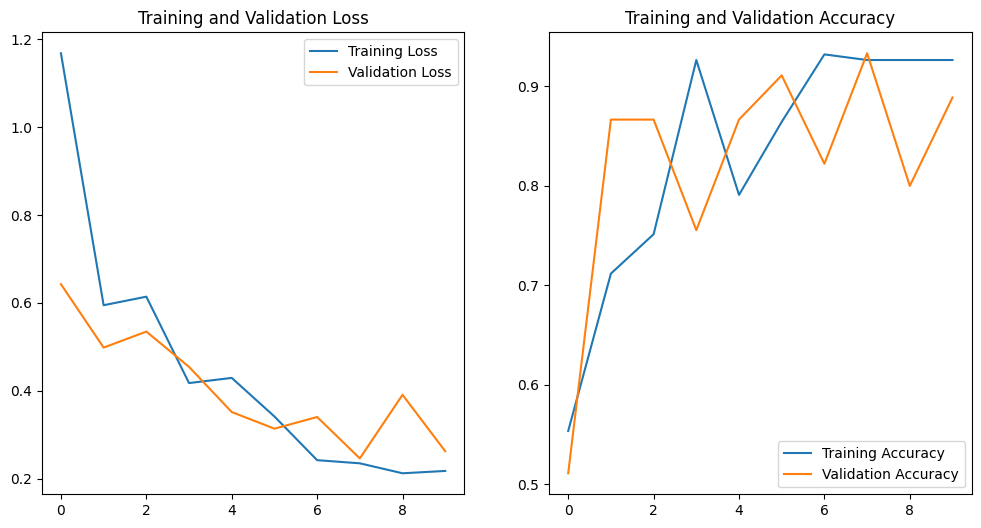

Training Time (mins): 0.20
Training Loss: 0.2174
Training Accuracy: 92.66%
Testing Accuracy: 88.89%
Number of Parameters: 50467969


In [14]:
vgg1_details = train_model(model_vgg1, X_train, y_train, X_test, y_test, 'VGG1', epochs=10)
plot_training_history(vgg1_details['history'])
print_model_details(vgg1_details)


In [15]:
# Assuming you have imported the necessary libraries (datetime, tensorflow, matplotlib.pyplot, etc.)
import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import io
from tensorflow import summary

# Clear out prior logging data.
!rm -rf logs/plots

logdir = "logs/plots/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir)

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

def image_grid_batch(data_batch, labels_batch, class_names, step):
    """Visualizes a batch of images with their corresponding labels."""
    # Assuming data_batch is a numpy array with shape (BATCH_SIZE, H, W, C)
    assert data_batch.ndim == 4
    assert len(data_batch) == len(labels_batch)

    figure = plt.figure(figsize=(10, 10))
    num_images = len(data_batch)
    size = int(np.ceil(np.sqrt(num_images)))

    for i in range(num_images):
        plt.subplot(size, size, i + 1, title=class_names[labels_batch[i]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # if grayscale
        if data_batch[i].shape[2] == 1:
            plt.imshow(data_batch[i].squeeze(), cmap=plt.cm.binary)
        else:
            plt.imshow(data_batch[i])

    with file_writer.as_default():
        tf.summary.image(
            "Visualize Images", plot_to_image(figure), step=step,
        )
        
# Define batch size
BATCH_SIZE = 40

# Visualize images in batches
step = 0
for start_idx in range(0, len(X_test), BATCH_SIZE):
    end_idx = min(start_idx + BATCH_SIZE, len(X_test))
    x_batch = X_test[start_idx:end_idx]
    y_batch = y_test[start_idx:end_idx]
    image_grid_batch(x_batch, y_batch, labels, step)
    step += 1

In [16]:
labels.shape

(222,)

## VGG (3 blocks)

In [17]:
# Define the VGG (3 blocks) model using an Input layer
def create_model_vgg3():
    model = Sequential([
        Input(shape=(224, 224, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    opt = SGD(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model instance
model_vgg3 = create_model_vgg3()


Epoch 1/30
6/6 - 3s - loss: 0.6982 - accuracy: 0.5593 - val_loss: 0.6725 - val_accuracy: 0.5111 - 3s/epoch - 528ms/step
Epoch 2/30
6/6 - 2s - loss: 0.6941 - accuracy: 0.5254 - val_loss: 0.6847 - val_accuracy: 0.4889 - 2s/epoch - 384ms/step
Epoch 3/30
6/6 - 2s - loss: 0.6572 - accuracy: 0.6158 - val_loss: 0.6426 - val_accuracy: 0.6667 - 2s/epoch - 355ms/step
Epoch 4/30
6/6 - 2s - loss: 0.6261 - accuracy: 0.6497 - val_loss: 0.7481 - val_accuracy: 0.4889 - 2s/epoch - 394ms/step
Epoch 5/30
6/6 - 2s - loss: 0.6264 - accuracy: 0.7401 - val_loss: 0.5955 - val_accuracy: 0.7111 - 2s/epoch - 357ms/step
Epoch 6/30
6/6 - 2s - loss: 0.5500 - accuracy: 0.7853 - val_loss: 0.5582 - val_accuracy: 0.7333 - 2s/epoch - 352ms/step
Epoch 7/30
6/6 - 2s - loss: 0.5251 - accuracy: 0.7401 - val_loss: 0.5860 - val_accuracy: 0.6889 - 2s/epoch - 354ms/step
Epoch 8/30
6/6 - 2s - loss: 0.5580 - accuracy: 0.7006 - val_loss: 0.5382 - val_accuracy: 0.6889 - 2s/epoch - 339ms/step
Epoch 9/30
6/6 - 2s - loss: 0.4386 - acc

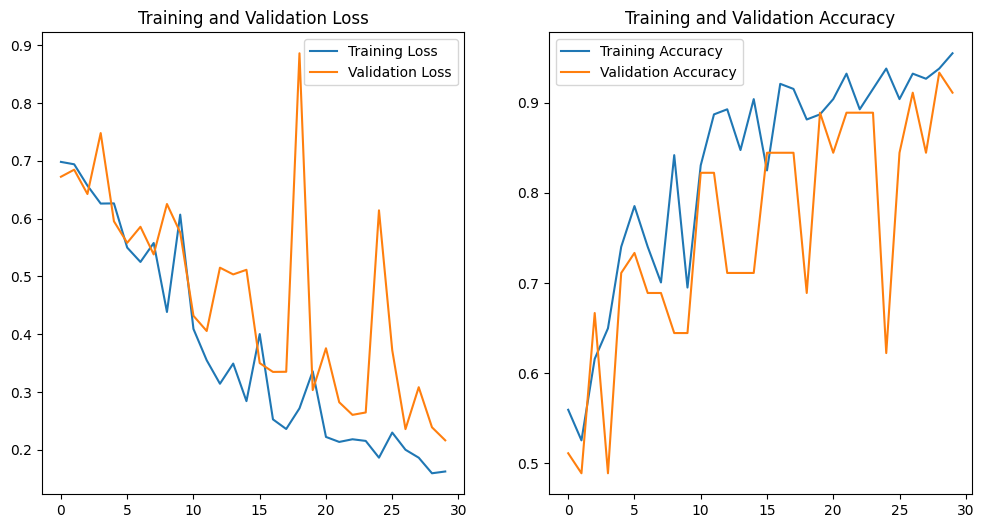

Training Time (mins): 1.07
Training Loss: 0.1627
Training Accuracy: 95.48%
Testing Accuracy: 91.11%
Number of Parameters: 11169089


In [18]:
vgg3_details = train_model(model_vgg3, X_train, y_train, X_test, y_test, 'VGG3', epochs=30)
plot_training_history(vgg3_details['history'])
print_model_details(vgg3_details)


## Data Augmentation 

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
data_gen = ImageDataGenerator(
    rotation_range=40,       # Random rotations from 0 to 40 degrees
    width_shift_range=0.2,   # Random horizontal shifts within 20% of the image width
    height_shift_range=0.2,  # Random vertical shifts within 20% of the image height
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Strategy to fill newly created pixels
)


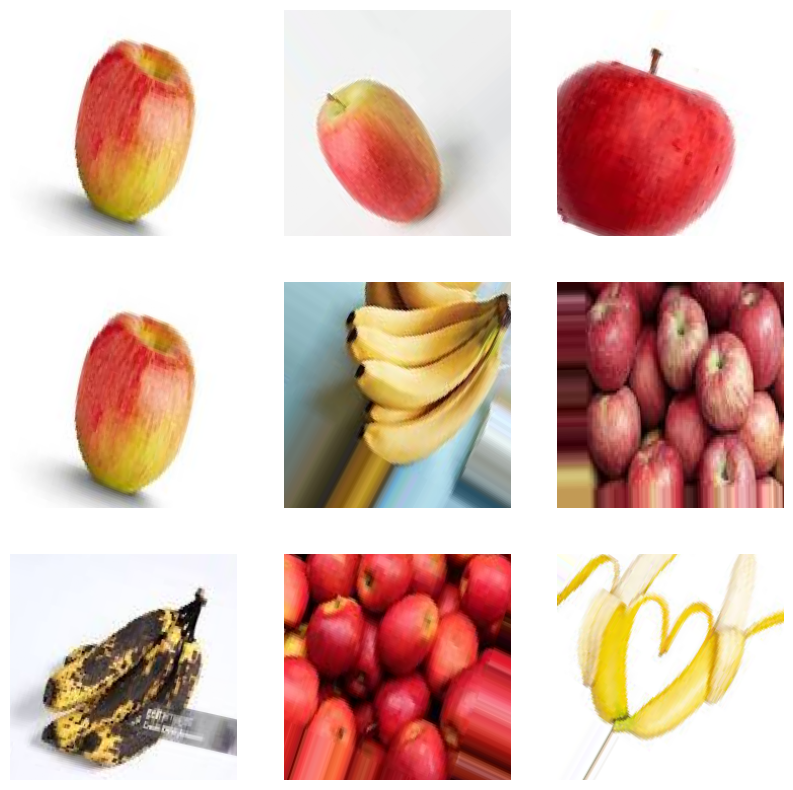

In [20]:
# Adjusted function to augment images and add to the dataset
def augment_images(X, y, data_gen, augmentations_per_image):
    X_augmented = []
    y_augmented = []
    for i in range(len(X)):
        x_img = np.expand_dims(X[i], axis=0)  # Expand dimension to make it (1, 224, 224, 3)
        y_label = y[i]
        # Create an iterator to perform data augmentation
        it = data_gen.flow(x_img, batch_size=1)
        # Generate augmented images
        for _ in range(augmentations_per_image):
            img_augmented = next(it)[0]  # Use 'next()' to get the next element from the iterator
            X_augmented.append(img_augmented)
            y_augmented.append(y_label)
    return X_augmented, y_augmented

# Apply the augmented function
X_augmented, y_augmented = augment_images(X_train, y_train, data_gen, 2)

# Combine the original and augmented datasets
X_train_augmented = np.concatenate((X_train, np.array(X_augmented)))
y_train_augmented = np.concatenate((y_train, np.array(y_augmented)))

# Optionally, visualize some of the augmented images to verify the augmentation
def display_augmented_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[int(np.random.random() * len(images))])
        plt.axis("off")
    plt.show()

display_augmented_images(X_augmented)


In [21]:
def create_model_vgg3():
    model = Sequential([
        Input(shape=(224, 224, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Re-create the VGG3 model to start fresh if it has been used before
model_vgg3_aug = create_model_vgg3()

Epoch 1/10
17/17 - 7s - loss: 1.1393 - accuracy: 0.5876 - val_loss: 0.4284 - val_accuracy: 0.8667 - 7s/epoch - 415ms/step
Epoch 2/10
17/17 - 6s - loss: 0.2986 - accuracy: 0.8945 - val_loss: 0.1720 - val_accuracy: 0.9556 - 6s/epoch - 347ms/step
Epoch 3/10
17/17 - 6s - loss: 0.1856 - accuracy: 0.9341 - val_loss: 0.1014 - val_accuracy: 0.9778 - 6s/epoch - 343ms/step
Epoch 4/10
17/17 - 6s - loss: 0.1263 - accuracy: 0.9435 - val_loss: 0.0760 - val_accuracy: 0.9778 - 6s/epoch - 341ms/step
Epoch 5/10
17/17 - 6s - loss: 0.1014 - accuracy: 0.9454 - val_loss: 0.1504 - val_accuracy: 0.9333 - 6s/epoch - 346ms/step
Epoch 6/10
17/17 - 6s - loss: 0.1153 - accuracy: 0.9397 - val_loss: 0.0885 - val_accuracy: 0.9778 - 6s/epoch - 346ms/step
Epoch 7/10
17/17 - 6s - loss: 0.0938 - accuracy: 0.9586 - val_loss: 0.1805 - val_accuracy: 0.9556 - 6s/epoch - 340ms/step
Epoch 8/10
17/17 - 6s - loss: 0.1051 - accuracy: 0.9510 - val_loss: 0.0696 - val_accuracy: 0.9778 - 6s/epoch - 347ms/step
Epoch 9/10
17/17 - 6s - 

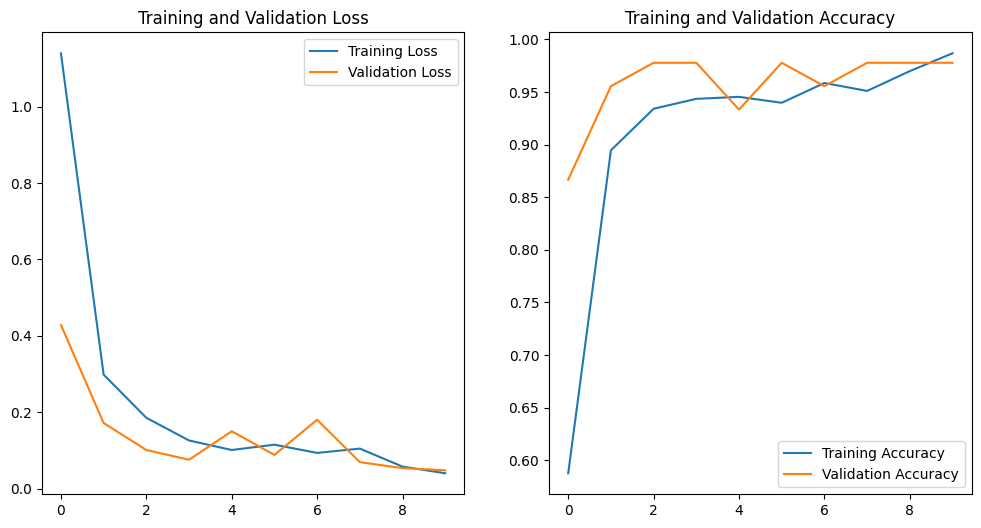

Training Time (mins): 1.00
Training Loss: 0.0405
Training Accuracy: 98.68%
Testing Accuracy: 97.78%
Number of Parameters: 11169089


In [22]:
vgg3_aug_details = train_model(model_vgg3_aug, X_train_augmented, y_train_augmented, X_test, y_test, 'VGG3_Aug', epochs=10)
plot_training_history(vgg3_aug_details['history'])
print_model_details(vgg3_aug_details)


## Transfer learning using VGG16 or VGG19 with tuning all layers

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load VGG16 pre-trained on ImageNet and include the input shape of our images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set all layers to be trainable
for layer in base_model.layers:
    layer.trainable = True

# Verify
print("Number of layers in the base model: ", len(base_model.layers))


58889256/58889256 [==============================] - 10s 0us/step
Number of layers in the base model:  19


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Add new classifier layers
model_transfer_all = Sequential([
    base_model,
    Flatten(),  # Use global average pooling to reduce the spatial dimensions
    Dense(512, activation='relu'),  # A dense layer as a hidden layer
    Dense(256, activation='relu'),  # A dense layer as a hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
opt = SGD(learning_rate=0.001)
model_transfer_all.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/10
17/17 - 120s - loss: 0.6618 - accuracy: 0.6460 - val_loss: 0.5295 - val_accuracy: 0.9333 - 120s/epoch - 7s/step
Epoch 2/10
17/17 - 118s - loss: 0.4736 - accuracy: 0.8757 - val_loss: 0.3688 - val_accuracy: 0.9778 - 118s/epoch - 7s/step
Epoch 3/10
17/17 - 118s - loss: 0.3143 - accuracy: 0.9510 - val_loss: 0.2984 - val_accuracy: 0.8667 - 118s/epoch - 7s/step
Epoch 4/10
17/17 - 118s - loss: 0.1988 - accuracy: 0.9623 - val_loss: 0.1530 - val_accuracy: 0.9778 - 118s/epoch - 7s/step
Epoch 5/10
17/17 - 118s - loss: 0.1181 - accuracy: 0.9831 - val_loss: 0.0693 - val_accuracy: 1.0000 - 118s/epoch - 7s/step
Epoch 6/10
17/17 - 118s - loss: 0.0854 - accuracy: 0.9849 - val_loss: 0.0418 - val_accuracy: 1.0000 - 118s/epoch - 7s/step
Epoch 7/10
17/17 - 118s - loss: 0.0505 - accuracy: 0.9925 - val_loss: 0.0274 - val_accuracy: 1.0000 - 118s/epoch - 7s/step
Epoch 8/10
17/17 - 118s - loss: 0.0348 - accuracy: 0.9981 - val_loss: 0.0154 - val_accuracy: 1.0000 - 118s/epoch - 7s/step
Epoch 9/10
17/17

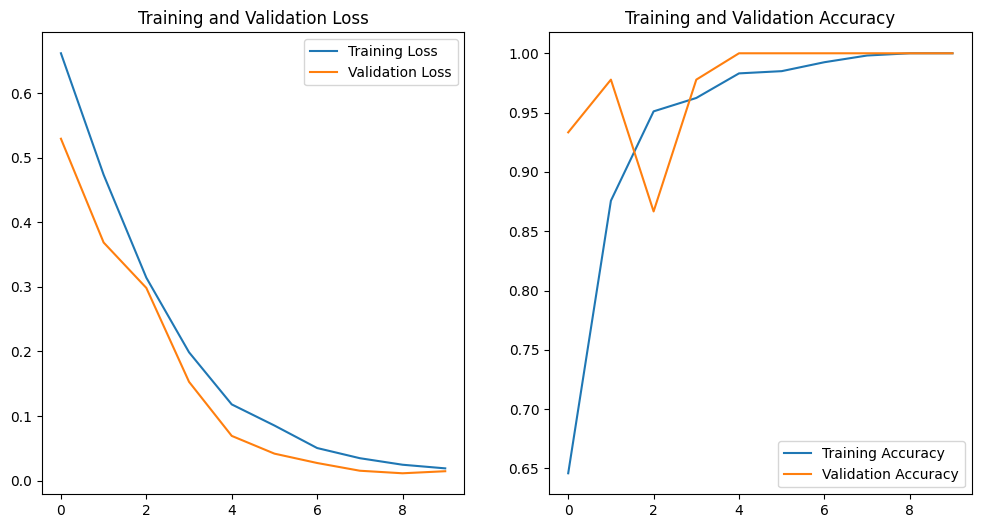

Training Time (mins): 19.69
Training Loss: 0.0190
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Number of Parameters: 27691841


In [25]:
transfer_all_details = train_model(model_transfer_all, X_train_augmented, y_train_augmented, X_test, y_test, 'Transfer_All', epochs=10)
plot_training_history(transfer_all_details['history'])
print_model_details(transfer_all_details)


## Transfer learning using VGG16 or VGG19 with tuning only final MLP layers 

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

# Load VGG16 pre-trained on ImageNet without the top layer
base_model_mlp = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all convolutional VGG16 layers
for layer in base_model_mlp.layers:
    layer.trainable = False

# Verify the trainable status of the layers
for layer in base_model_mlp.layers:
    print(layer, layer.trainable)


<keras.src.engine.input_layer.InputLayer object at 0x7fa88f486a30> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f4869a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f50c6a0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa88f58ca60> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f3f4f40> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f51dd00> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa88f3fbf70> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f3fbe80> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f402700> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f399370> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa88f390430> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa88f399fd0> False
<keras.src.layers.convolutional.conv2d.Conv2D ob

In [27]:
# Create a new 'head' for the model (i.e., the top layers)
model_transfer_mlp = Sequential([
    base_model_mlp,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_transfer_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_transfer_mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_11 (Dense)            (None, 256)               6422784   
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/10
17/17 - 43s - loss: 1.8160 - accuracy: 0.6780 - val_loss: 0.0529 - val_accuracy: 1.0000 - 43s/epoch - 3s/step
Epoch 2/10
17/17 - 42s - loss: 0.1385 - accuracy: 0.9360 - val_loss: 0.0264 - val_accuracy: 1.0000 - 42s/epoch - 2s/step
Epoch 3/10
17/17 - 42s - loss: 0.0327 - accuracy: 0.9887 - val_loss: 0.0349 - val_accuracy: 1.0000 - 42s/epoch - 2s/step
Epoch 4/10
17/17 - 42s - loss: 0.0203 - accuracy: 0.9925 - val_loss: 0.0069 - val_accuracy: 1.0000 - 42s/epoch - 2s/step
Epoch 5/10
17/17 - 42s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 42s/epoch - 2s/step
Epoch 6/10
17/17 - 41s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 41s/epoch - 2s/step
Epoch 7/10
17/17 - 41s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 41s/epoch - 2s/step
Epoch 8/10
17/17 - 41s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000 - 41s/epoch - 2s/step
Epoch 9/10
17/17 - 41s - loss: 0

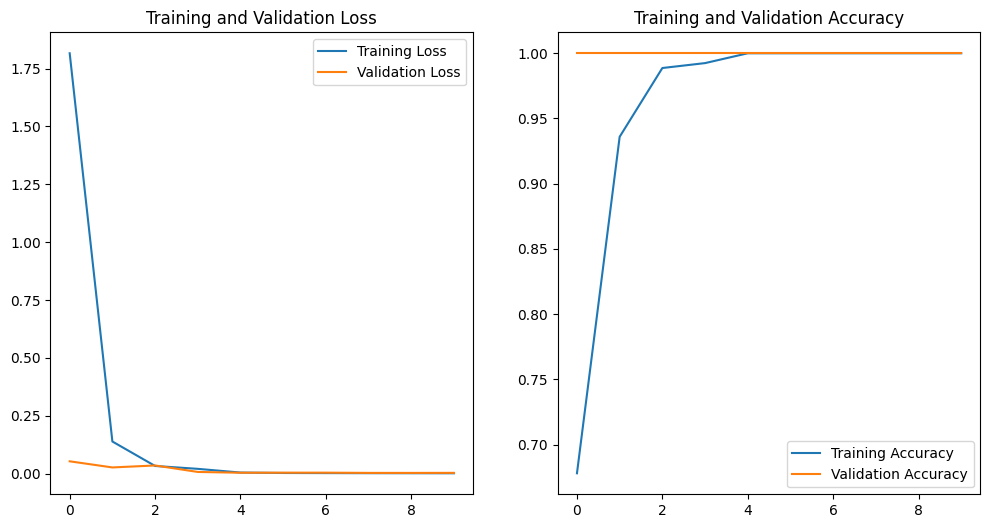

Training Time (mins): 6.96
Training Loss: 0.0012
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
Number of Parameters: 21137729


In [28]:
transfer_mlp_details = train_model(model_transfer_mlp, X_train_augmented, y_train_augmented, X_test, y_test, 'Transfer_MLP', epochs=10)
plot_training_history(transfer_mlp_details['history'])
print_model_details(transfer_mlp_details)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_mlp_model(input_shape=(224, 224, 3)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the MLP model
mlp_model = create_mlp_model()

# Model summary to check the number of parameters
mlp_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 64)                9633856   
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9640641 (36.78 MB)
Trainable params: 964

Epoch 1/10
6/6 - 1s - loss: 0.6859 - accuracy: 0.5876 - val_loss: 0.6649 - val_accuracy: 0.7556 - 948ms/epoch - 158ms/step
Epoch 2/10
6/6 - 0s - loss: 0.6475 - accuracy: 0.7514 - val_loss: 0.6368 - val_accuracy: 0.6444 - 202ms/epoch - 34ms/step
Epoch 3/10
6/6 - 0s - loss: 0.6223 - accuracy: 0.6893 - val_loss: 0.5830 - val_accuracy: 0.7333 - 209ms/epoch - 35ms/step
Epoch 4/10
6/6 - 0s - loss: 0.5646 - accuracy: 0.7062 - val_loss: 0.5509 - val_accuracy: 0.7778 - 192ms/epoch - 32ms/step
Epoch 5/10
6/6 - 0s - loss: 0.6123 - accuracy: 0.7119 - val_loss: 0.7282 - val_accuracy: 0.5111 - 229ms/epoch - 38ms/step
Epoch 6/10
6/6 - 0s - loss: 0.5953 - accuracy: 0.6723 - val_loss: 0.5931 - val_accuracy: 0.7111 - 208ms/epoch - 35ms/step
Epoch 7/10
6/6 - 0s - loss: 0.5099 - accuracy: 0.7740 - val_loss: 0.7043 - val_accuracy: 0.5556 - 215ms/epoch - 36ms/step
Epoch 8/10
6/6 - 0s - loss: 0.4715 - accuracy: 0.7910 - val_loss: 0.5417 - val_accuracy: 0.6667 - 193ms/epoch - 32ms/step
Epoch 9/10
6/6 - 0s - l

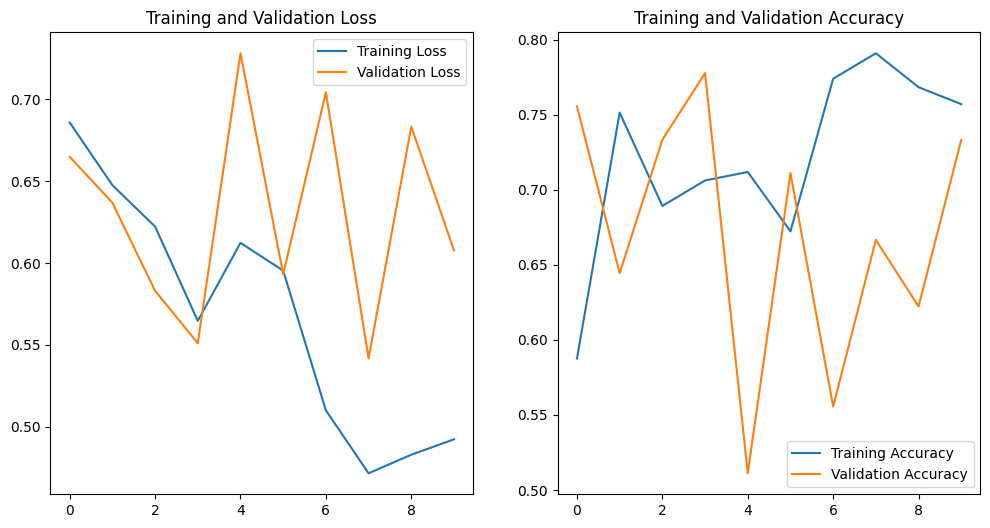

Training Time (mins): 0.05
Training Loss: 0.4922
Training Accuracy: 75.71%
Testing Accuracy: 73.33%
Number of Parameters: 9640641


In [31]:
# Assuming train_model function is already defined and data is prepared
mlp_details = train_model(mlp_model, X_train, y_train, X_test, y_test, 'MLP_Model', epochs=10)

# Use the plotting and details printing functions you have to analyze performance
plot_training_history(mlp_details['history'])
print_model_details(mlp_details)


In [32]:
# Assuming vgg1_details, vgg3_details, vgg3_aug_details, transfer_all_details, and transfer_mlp_details have been defined as suggested
models_results = [
    {
        'Model': 'VGG (1 block)',
        'Training Time (mins)': vgg1_details['training_time'],
        'Training Loss': vgg1_details['history'].history['loss'][-1],
        'Training Accuracy': vgg1_details['history'].history['accuracy'][-1] * 100,
        'Testing Accuracy': vgg1_details['history'].history['val_accuracy'][-1] * 100,
        'Number of Parameters': vgg1_details['num_params']
    },
    {
        'Model': 'VGG (3 blocks)',
        'Training Time (mins)': vgg3_details['training_time'],
        'Training Loss': vgg3_details['history'].history['loss'][-1],
        'Training Accuracy': vgg3_details['history'].history['accuracy'][-1] * 100,
        'Testing Accuracy': vgg3_details['history'].history['val_accuracy'][-1] * 100,
        'Number of Parameters': vgg3_details['num_params']
    },
    {
        'Model': 'VGG (3 blocks) with augmentation',
        'Training Time (mins)': vgg3_aug_details['training_time'],
        'Training Loss': vgg3_aug_details['history'].history['loss'][-1],
        'Training Accuracy': vgg3_aug_details['history'].history['accuracy'][-1] * 100,
        'Testing Accuracy': vgg3_aug_details['history'].history['val_accuracy'][-1] * 100,
        'Number of Parameters': vgg3_aug_details['num_params']
    },
    {
        'Model': 'Transfer Learning (VGG16, all layers)',
        'Training Time (mins)': transfer_all_details['training_time'],
        'Training Loss': transfer_all_details['history'].history['loss'][-1],
        'Training Accuracy': transfer_all_details['history'].history['accuracy'][-1] * 100,
        'Testing Accuracy': transfer_all_details['history'].history['val_accuracy'][-1] * 100,
        'Number of Parameters': transfer_all_details['num_params']
    },
    {
        'Model': 'Transfer Learning (VGG16, MLP only)',
        'Training Time (mins)': transfer_mlp_details['training_time'],
        'Training Loss': transfer_mlp_details['history'].history['loss'][-1],
        'Training Accuracy': transfer_mlp_details['history'].history['accuracy'][-1] * 100,
        'Testing Accuracy': transfer_mlp_details['history'].history['val_accuracy'][-1] * 100,
        'Number of Parameters': transfer_mlp_details['num_params']
    },
    {
    'Model': 'MLP Model',
    'Training Time (mins)': mlp_details['training_time'],
    'Training Loss': mlp_details['history'].history['loss'][-1],
    'Training Accuracy': mlp_details['history'].history['accuracy'][-1] * 100,
    'Testing Accuracy': mlp_details['history'].history['val_accuracy'][-1] * 100,
    'Number of Parameters': mlp_model.count_params() / 1e6  # Convert to millions
    }
]

# Function to print the table
def print_results_table(results):
    print(f"{'Model':<40}{'Train Time (mins)':<20}{'Train Loss':<15}{'Train Acc (%)':<15}{'Test Acc (%)':<15}{'Params (M)':<15}")
    for result in results:
        print(f"{result['Model']:<40}{result['Training Time (mins)']:<20.2f}{result['Training Loss']:<15.4f}{result['Training Accuracy']:<15.2f}{result['Testing Accuracy']:<15.2f}{result['Number of Parameters']:,.0f}")

# Call the function to print the table
print_results_table(models_results)


Model                                   Train Time (mins)   Train Loss     Train Acc (%)  Test Acc (%)   Params (M)     
VGG (1 block)                           0.20                0.2174         92.66          88.89          50,467,969
VGG (3 blocks)                          1.07                0.1627         95.48          91.11          11,169,089
VGG (3 blocks) with augmentation        1.00                0.0405         98.68          97.78          11,169,089
Transfer Learning (VGG16, all layers)   19.69               0.0190         100.00         100.00         27,691,841
Transfer Learning (VGG16, MLP only)     6.96                0.0012         100.00         100.00         21,137,729
MLP Model                               0.05                0.4922         75.71          73.33          10
